# Imports

Before we can do anything, we gotta do the imports...

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

speed_humps_data = pd.read_csv("Speed-Humps.csv")

# Data

Now that we have all of our tools in our bag, let's look at the first five columns of our data to see what we're working with:

In [34]:
speed_humps_data.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


With this dataset, there's not a column that says "speed hump count" or anything, so it doesn't really tell us about the total amount of speed humps each neighborhood has (which is what we really want). So I'll filter for the "neighborhood" column, and see how many entries each neighborhood has by using the \'value_counts\' function.

In [35]:
speed_humps_data['neighborhood'].value_counts()

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
South Side Slopes       4
Perry North             4
Upper Hill              4
Homewood South          4
Brookline               4
South Side Flats        3
Bloomfield              3
Mount Washington        3
Garfield                3
Squirrel Hill North     3
Highland Park           2
Central Oakland         1
Stanton Heights         1
Overbrook               1
Name: neighborhood, dtype: int64

# Visuals

Now that I have the nice and filtered data, I want to see it visually. I dealt with box plots a lot in high school, so I'll use a box plot to represnt the data!

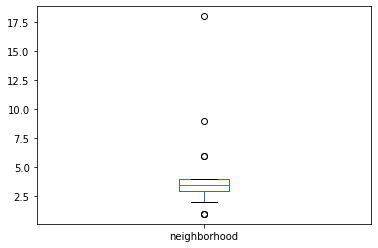

In [42]:
speed_humps_data['neighborhood'].value_counts().plot.box()

![confusion](https://media.giphy.com/media/1X7lCRp8iE0yrdZvwd/giphy.gif)

Well that is not very helpful. I'll drop the ".box" part of that plot code.

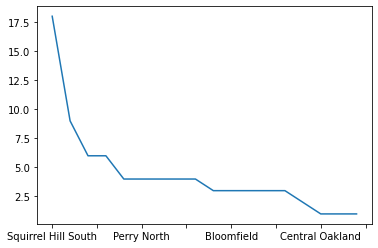

In [40]:
speed_humps_data['neighborhood'].value_counts().plot()

Better, but still not great...
I'll try the ".bar" function:

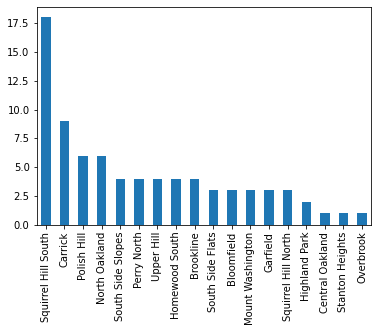

In [36]:
speed_humps_data['neighborhood'].value_counts().plot.bar()

Perfect.

# GeoMap

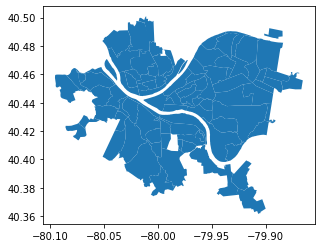

In [44]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

In [60]:
hump_hoods = pd.DataFrame(speed_humps_data['neighborhood'].value_counts())
hump_hoods

,neighborhood
Squirrel Hill South,18
Carrick,9
Polish Hill,6
North Oakland,6
South Side Slopes,4
Perry North,4
Upper Hill,4
Homewood South,4
Brookline,4
South Side Flats,3


In [62]:
speed_humps_map = neighborhoods.merge(hump_hoods, how='left', left_on = 'hood', right_on = 'neighborhood')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [66]:
speed_humps_map = pd.concat([hump_hoods, neighborhoods], keys=["df1", 'df2'])
speed_humps_map

neighborhood  objectid  fid_blockg statefp10  \
df1 Squirrel Hill South          18.0       NaN         NaN       NaN   
    Carrick                       9.0       NaN         NaN       NaN   
    Polish Hill                   6.0       NaN         NaN       NaN   
    North Oakland                 6.0       NaN         NaN       NaN   
    South Side Slopes             4.0       NaN         NaN       NaN   
...                               ...       ...         ...       ...   
df2 85                            NaN      88.0       298.0        42   
    86                            NaN      89.0        32.0        42   
    87                            NaN      90.0        57.0        42   
    88                            NaN      91.0        96.0        42   
    89                            NaN    1292.0         NaN      None   

                        countyfp10 tractce10 blkgrpce10       geoid10  \
df1 Squirrel Hill South        NaN       NaN        NaN           NaN   
    Carrick                    NaN       NaN        NaN           NaN   
    Polish Hill                NaN       NaN        NaN           NaN   
    North Oakland              NaN       NaN        NaN           NaN   
    South Side Slopes          NaN       NaN        NaN           NaN   
...                            ...       ...        ...           ...   
df2 85                         003    563100          3  420035631003   
    86                         003    562600          1  420035626001   
    87                         003    250700          1  420032507001   
    88                         003    562300          2  420035623002   
    89                        None      None       None          None   

                            namelsad10 mtfcc10  ...    shape_ar_1  page_numbe  \
df1 Squirrel Hill South            NaN     NaN  ...           NaN         NaN   
    Carrick                        NaN     NaN  ...           NaN         NaN   
    Polish Hill                    NaN     NaN  ...           NaN         NaN   
    North Oakland                  NaN     NaN  ...           NaN         NaN   
    South Side Slopes              NaN     NaN  ...           NaN         NaN   
...                                ...     ...  ...           ...         ...   
df2 85                   Block Group 3   G5030  ...  1.027890e+07        15.0   
    86                   Block Group 1   G5030  ...  5.579501e+06        15.0   
    87                   Block Group 1   G5030  ...  6.050988e+06        15.0   
    88                   Block Group 2   G5030  ...  1.271304e+07        15.0   
    89                            None    None  ...           NaN        15.0   

                                    plannerass created_us  \
df1 Squirrel Hill South                    NaN        NaN   
    Carrick                                NaN        NaN   
    Polish Hill                            NaN        NaN   
    North Oakland                          NaN        NaN   
    South Side Slopes                      NaN        NaN   
...                                        ...        ...   
df2 85                          Sophia Robison  pgh.admin   
    86                          Sophia Robison  pgh.admin   
    87                   Stephanie Joy Everett  pgh.admin   
    88                           Ose Akinlotan  pgh.admin   
    89                   Stephanie Joy Everett  pgh.admin   

                                       created_da  last_edite  \
df1 Squirrel Hill South                       NaN         NaN   
    Carrick                                   NaN         NaN   
    Polish Hill                               NaN         NaN   
    North Oakland                             NaN         NaN   
    South Side Slopes                         NaN         NaN   
...                                           ...         ...   
df2 85                   2019-10-23T14:17:16.403Z   pgh.admin   
    86                   2019-10-23T14:17:16.

In [75]:
speed_humps_map = hump_hoods.append(neighborhoods)
speed_humps_map.head(20)

,neighborhood,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
Squirrel Hill South,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrick,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polish Hill,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Oakland,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Side Slopes,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Perry North,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Upper Hill,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Homewood South,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brookline,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Side Flats,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


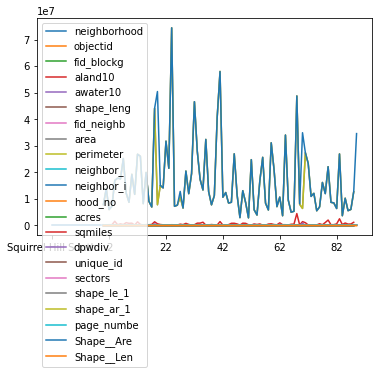

In [74]:
speed_humps_map.plot()